<a href="https://colab.research.google.com/github/javiercode/temperaturaTensorFlow/blob/main/ejemploTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

leyendo CSV


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


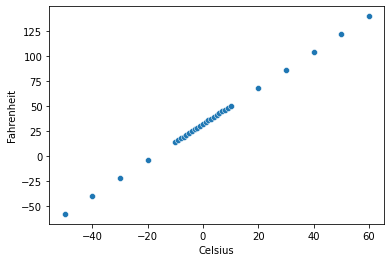

Seleccionando las columnas
Creando el modelo
Compilando el modelo
Entrenando el modelo
Epoch 1/100
1/1 [==============================] - 0s 288ms/step - loss: 2704.5776
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 1296.2980
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 897.8492
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 1141.0359
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 1378.3036
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1312.3607
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 1044.8838
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 760.4456
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 587.7289
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 561.3846
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 625.3830
Epoch 12/100
1/1 [=====

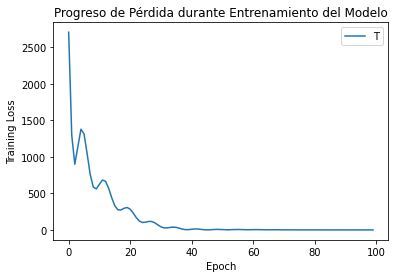

Temperatura de Prediccion: [[51.585186]]
Temperatura de Ecuacion: 51.8


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#import io
#from google.colab import drive 
#drive.mount('/content/gdrive')
#link = 'https://drive.google.com/file/d/15q04WtwrTp1SGUuIJrM4U7C6kB8QOtPL/view'

print("leyendo CSV")
 
#from google.colab import files
#uploaded = files.upload()
#id = link.split("/")[-2]
#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('celsius_a_fahrenheit.csv')  
#temperature_df = pd.read_csv("gdrive/Colab Notebooks/celsius_a_fahrenheit.csv")
#temperature_df = pd.read_csv(io.BytesIO(uploaded['celsius_a_fahrenheit.csv']))
#temperature_df = pd.read_csv("celsius_a_fahrenheit.csv")
import pandas as pd
url = 'https://raw.githubusercontent.com/javiercode/portafolio/main/celsius_a_fahrenheit.csv'
temperature_df = pd.read_csv(url)


#Visualización
sns.scatterplot(temperature_df['Celsius'], temperature_df['Fahrenheit'])
plt.show()

#Cargando Set de Datos
print ("Seleccionando las columnas")
X_train = temperature_df['Celsius']
y_train = temperature_df['Fahrenheit']

#Creando el Modelo
print ("Creando el modelo")
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

#Compilado
print ("Compilando el modelo")
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

#Entrenando el modelo
print ("Entrenando el modelo")
epochs_hist = model.fit(X_train, y_train, epochs = 100)

#Evaluando modelo
print ("Evaluando el modelo entrenado")
print ("Keys:")
print(epochs_hist.history.keys())
	
#Grafico
plt.plot(epochs_hist.history['loss'])
plt.title('Progreso de Pérdida durante Entrenamiento del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')
plt.show()


#Realizando prediccion utilizando el modelo entrenado
Temp_C = 11
Temp_F = model.predict([Temp_C])
print("Temperatura de Prediccion: " + str(Temp_F))

Temp_F = 9/5 * Temp_C + 32
print("Temperatura de Ecuacion: " + str(Temp_F))